In [1]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
sns.set(rc={'figure.figsize':(9,7)})#Для более понятных графиков

# Домашнее задание по курсу анализа данных
Версия от 12.10.2021

Всего 50 баллов = 40 основных + 10 дополнительных

**Оценка**  = (Количество баллов за работу*2 + 20)/10

**Мягкий дедлайн: 30.10.2021  23:59**

**Жесткий дедлайн: 6.11.2021  23:59**

Присылать решение ссылкой на ваш **github** в телеграмм **@Aleron75** или на почту **milenkin.aa@phystech.edu**

**Автор:** Миленькин Александр

In [2]:
df = pd.read_csv('../data/people_data_clustering.csv', index_col=0)
print('Размеры',df.shape)
df.head()


Размеры (6000, 9)


,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,
0,1,4.0,4.420530e+07,1,82.0,Engineer,1.003674e+07,NaN,0.727499
1,1,2.0,1.737490e+08,1,32.0,Doctor,1.014051e+07,0.0,0.383234
2,1,6.0,2.489055e+08,1,14.0,Entertainment,1.043318e+07,NaN,0.432142
3,0,1.0,1.268718e+08,0,10.0,Lawyer,1.004299e+07,NaN,0.377987
4,1,9.0,8.596042e+07,1,99.0,Artist,1.021908e+07,NaN,0.657579


<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой информацию по жителям некоторого города.

* `was_married` - Был ли когда-либо женат/замужем
* `childrens` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол
* `age` - Возраст
* `home_cost` - Стоимость жилья
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
    
</div>

<div class="alert alert-info">
<b>Задание</b>

Изучить датасет и, используя класстерный анализ, разбить пользователей на сегменты. Сделать выводы о причинах такой кластеризации.

# Изучение датасета (5 баллов)
* Какие признаки численные?
* Какие признаки категориальные?
* Какие признаки бинарные?
* Какие признаки имеют нормальное распределение?
* Какие признаки бессмысленные?

* Численные - children, salary, age, home_cost, happyness 
* Категориальные - was_married, Professon 
* Бинарные - sex, drive_info 

 

(array([  30.,  171.,  680., 1331., 1540., 1125.,  688.,  328.,   87.,
          20.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

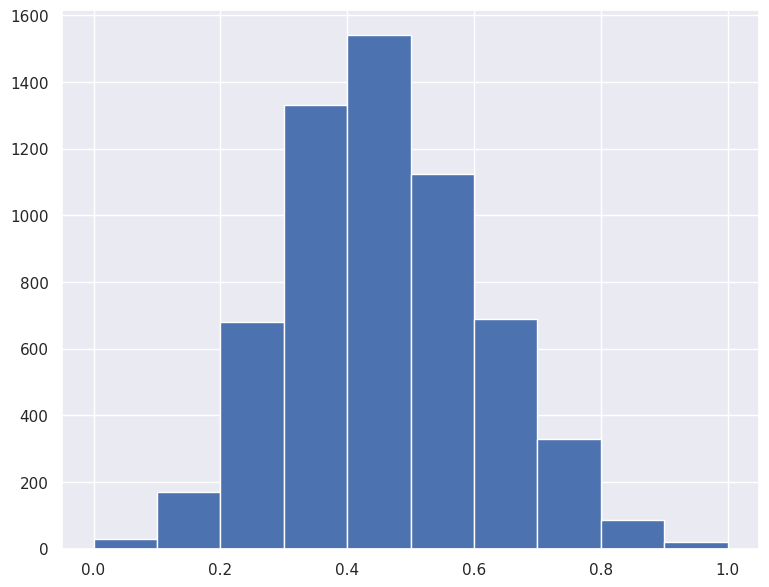

In [3]:
plt.hist(df['happyness'])

(array([127., 221., 504., 639., 633., 423., 164.,  50.,  10.,   1.]),
 array([5.00264324e+07, 7.96165027e+07, 1.09206573e+08, 1.38796643e+08,
        1.68386714e+08, 1.97976784e+08, 2.27566854e+08, 2.57156925e+08,
        2.86746995e+08, 3.16337065e+08, 3.45927136e+08]),
 <BarContainer object of 10 artists>)

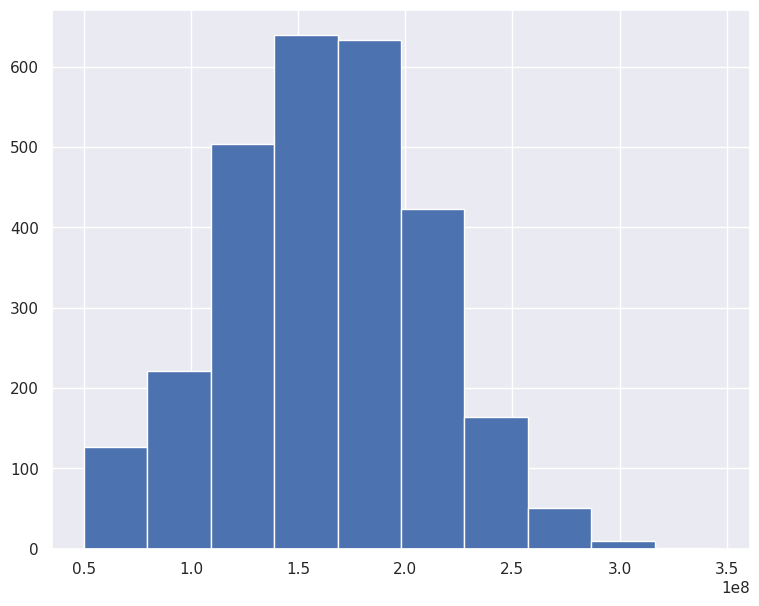

In [4]:
plt.hist(df.loc[df['salary'] > 0.5 * 10 ** 8]['salary'])

Графики "happyness" и "salary" имеет нормальное распределение. Для salary при больших значениях

(array([ 948.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5052.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

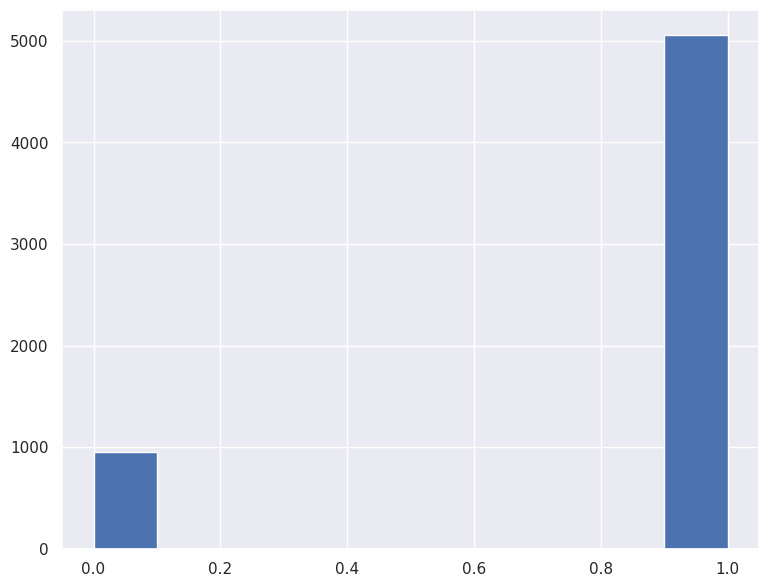

In [5]:
plt.hist(df['was_married'])

* Бессмысленные являются признаки "was_married" (Больше 80% случаев признак = 1) и "drive_info" (Больше 45% пропусков)

# Чистка датасета (5 баллов)
* Есть ли дубли в данных? 
* Есть ли пропуски в данных? 
* Как стоит поступить с выбросами? (удалить или заменить \ `dropna()` или `fillna()` )
* Удалить бесмысленные признаки (`drop()`)
* Найти и удалить выбросы по признаку `home_cost`. Сколько их?

In [6]:
duplicateRows = df[df.duplicated()]
duplicateRows #Полных дублей нет

,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,


In [7]:
df.isnull().sum() #Поиск нулей в датафрейме

was_married       0
children          0
salary            0
sex               0
age               0
profession        0
home_cost         0
drive_info     2770
happyness         0
dtype: int64

In [8]:
df.drop(['drive_info','was_married'], axis=1, inplace=True) # Удаление бессмысленных признаков

In [9]:
df.head()

,children,salary,sex,age,profession,home_cost,happyness
id,,,,,,,
0,4.0,4.420530e+07,1,82.0,Engineer,1.003674e+07,0.727499
1,2.0,1.737490e+08,1,32.0,Doctor,1.014051e+07,0.383234
2,6.0,2.489055e+08,1,14.0,Entertainment,1.043318e+07,0.432142
3,1.0,1.268718e+08,0,10.0,Lawyer,1.004299e+07,0.377987
4,9.0,8.596042e+07,1,99.0,Artist,1.021908e+07,0.657579


{'whiskers': [<matplotlib.lines.Line2D at 0x7fd222b157f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd222ba0d90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd222b15520>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd222b15cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd222b15f70>],
 'means': []}

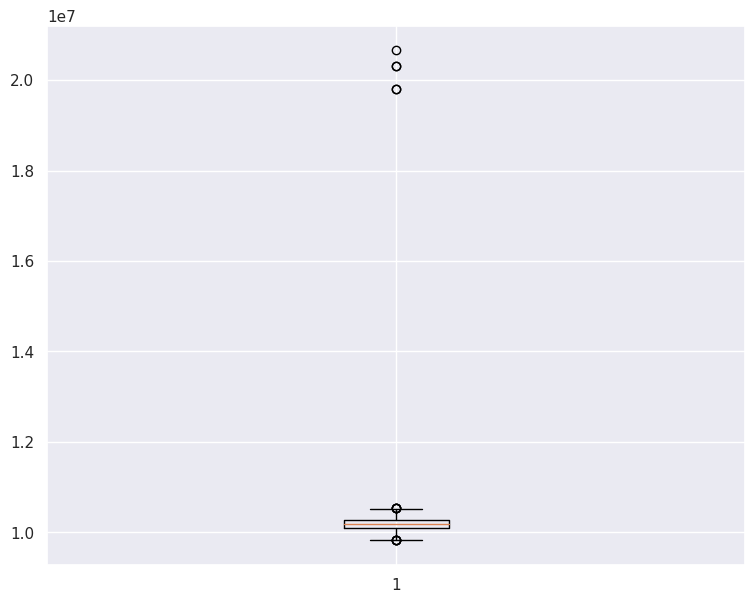

In [10]:
plt.boxplot(df['home_cost'])                 # Проверим наличие выбросов с помощью "коробки с усами". 
                                             # Только для home_cost как сказано в задании             

Выбросы можно удалить т.к. их не много.

In [11]:
def outliers(df, collumn):                   # Функция для определения выбросов
    Q1 = df[collumn].quantile(0.25)          # Первый квартиль
    Q3 = df[collumn].quantile(0.75)          # Третий квартиль
    IQR = Q3 - Q1                            # Межквартильное расстояние
    lower_bound = Q1 - 1.5 * IQR             # Нижняя граница
    upper_bound = Q3 + 1.5 * IQR             # Верхняя граница
    outlier = df.index[ (df[collumn] < lower_bound) | (df[collumn] > upper_bound) ] #поиск выбросов
    
    return outlier
index_list = []                              # Пустой список
for collumn in ["home_cost"]:
    index_list.extend(outliers(df, collumn))
    
index_list                                   # Индексы выбросов

[173, 714, 1140, 1779, 1825, 2070, 2966, 3307, 3380, 3912, 4014, 4727, 173]

In [12]:
len(index_list)                              # Кол-во выбросов

13

In [13]:
# функция для удаления строк с выбросами
def remove(df, outlier):                 
    outlier = sorted(set(outlier))
    df = df.drop(outlier)
    return df

In [14]:
df_cleaned = remove(df, index_list)
df_cleaned.shape                             # Новый датафрейм без найденных выбросов

(5987, 7)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd222a9a4f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd222a9aa30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd222a9a250>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd222a9af70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd222aa8250>],
 'means': []}

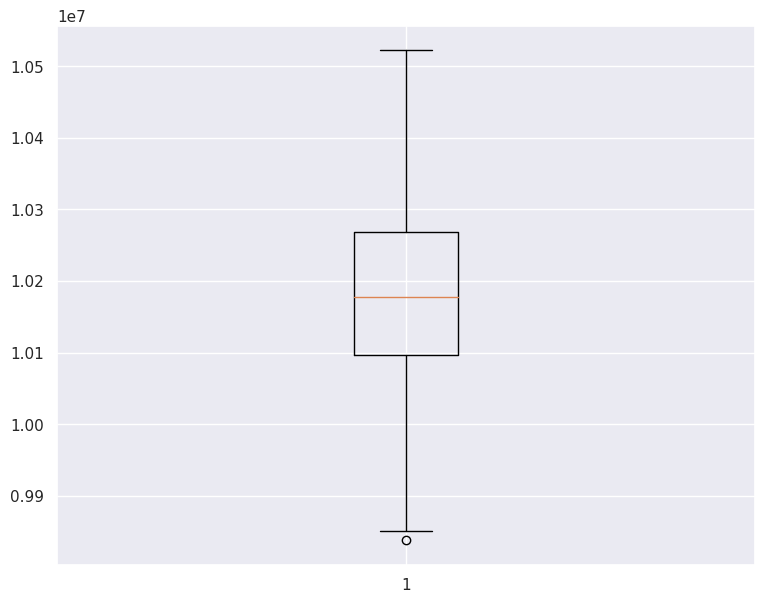

In [15]:
# Из-за удаления выбросов изменились значения границ и могли появиться новые выбросы. Проверим это
plt.boxplot(df_cleaned['home_cost'])         

In [16]:
# Нахождение нового выброса
index_list = []                              
for collumn in ["home_cost"]:
    index_list.extend(outliers(df_cleaned, collumn))
    
index_list

[4365]

In [17]:
df_cleaned = remove(df_cleaned, index_list)
df_cleaned.shape

(5986, 7)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd222a84ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd2227b9220>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd222a84a00>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd2227b9760>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd2227b9a00>],
 'means': []}

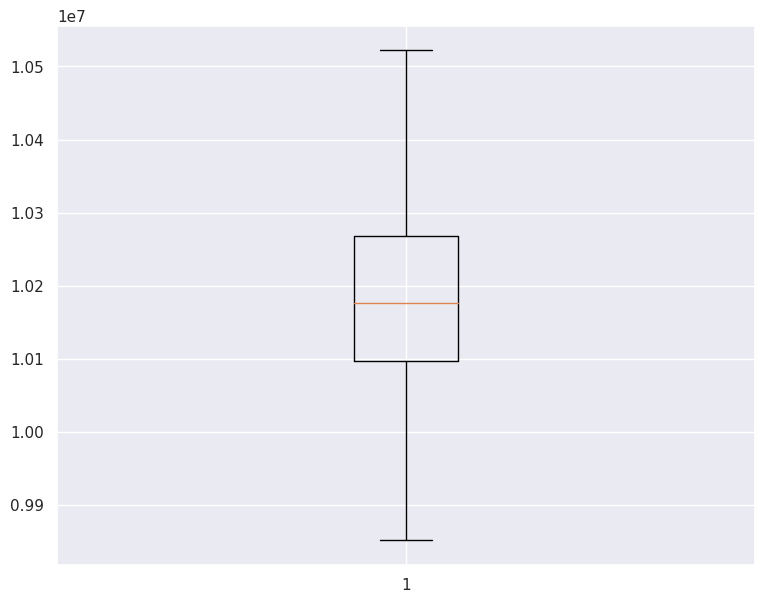

In [18]:
# Убедимся еще раз , что выбросов нет
plt.boxplot(df_cleaned['home_cost'])

# Изучение зависимых признаков (5 балла). 
* Построить матрицу корреляций
* Визуализировать матрицу корреляции с помощью heatmap
* Сделать выводы по самым скоррелированные признакам
* Построить график зависимости между двумя самыми зависимыми признаками



In [19]:
df_cleaned

,children,salary,sex,age,profession,home_cost,happyness
id,,,,,,,
0,4.0,4.420530e+07,1,82.0,Engineer,1.003674e+07,0.727499
1,2.0,1.737490e+08,1,32.0,Doctor,1.014051e+07,0.383234
2,6.0,2.489055e+08,1,14.0,Entertainment,1.043318e+07,0.432142
3,1.0,1.268718e+08,0,10.0,Lawyer,1.004299e+07,0.377987
4,9.0,8.596042e+07,1,99.0,Artist,1.021908e+07,0.657579
...,...,...,...,...,...,...,...
495,0.0,3.589436e+07,1,3.0,Executive,1.007038e+07,0.599222
496,3.0,2.454208e+06,0,20.0,Homemaker,1.009348e+07,0.259710
497,0.0,3.335405e+06,0,17.0,Healthcare,1.016696e+07,0.258779


In [20]:
# В матрицу корреляций нельзя вставлять типы данных object поэтому уберем столбец с профессиями 
num_data = df_cleaned.select_dtypes(include=['int', 'float', 'int64']) 
df_matrix = num_data.corr()
df_matrix.head()

,children,salary,sex,age,home_cost,happyness
children,1.000000,0.376081,0.389535,0.743008,0.288399,0.606055
salary,0.376081,1.000000,0.239759,0.073114,0.686234,0.200364
sex,0.389535,0.239759,1.000000,0.341558,0.183689,0.469861
age,0.743008,0.073114,0.341558,1.000000,0.053030,0.609294
home_cost,0.288399,0.686234,0.183689,0.053030,1.000000,0.152747


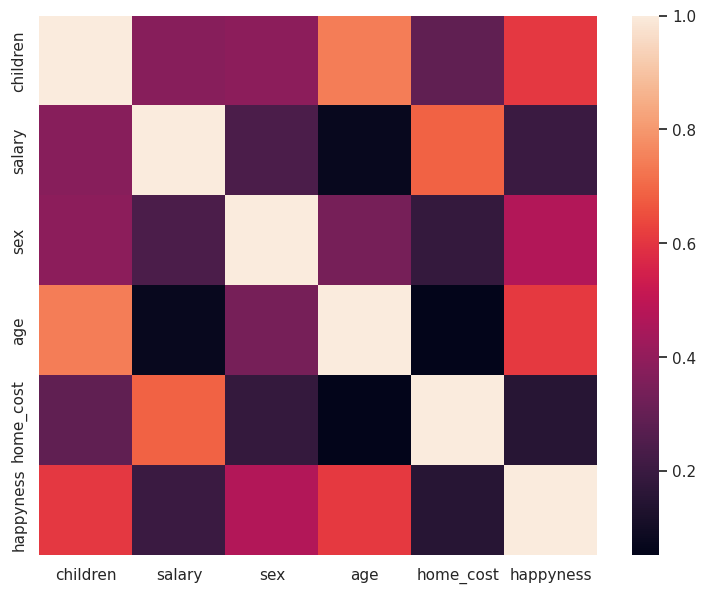

In [21]:
# Тепловая карта матрицы корреляций 
ax = sns.heatmap(df_matrix)

* Из матрицы корреляций видно, что самые скоррелированные признаки это Возраст и кол-во детей. Скорее всего это не ложная корреляция т.к. чем старше человек тем больше детей он может завести. 


0.7430079496554174

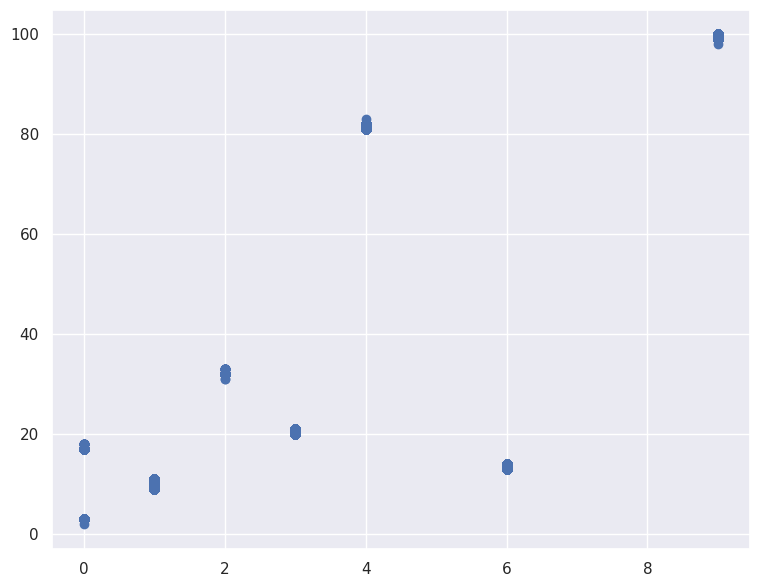

In [22]:
# Построим график зависимости этих признаков
plt.scatter(num_data.children, num_data.age)
scipy.stats.pearsonr(num_data.children, num_data.age)[0]

# Нормировка признаков (3 балла)
* Отнормировать данные
* Обосновать выбор нормировки

In [23]:
# Для начала перекодируем столбец с категориальными переменными 
from sklearn.preprocessing import OneHotEncoder            
col = 'profession'
df[col].fillna('Investment', inplace=True)
df[col]
        
col = 'profession'
one_hot = pd.get_dummies(df_cleaned[col])
one_hot.head()


,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
id,,,,,,,,,
0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0


In [24]:
# Удаляем столбец , который перекодировали 
df_cleaned = df_cleaned.drop(col, axis = 1)
# Добавляем полученные столбцы 
df_cleaned = df_cleaned.join(one_hot)
df_cleaned

,children,salary,sex,age,home_cost,happyness,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
id,,,,,,,,,,,,,,,
0,4.0,4.420530e+07,1,82.0,1.003674e+07,0.727499,0,0,1,0,0,0,0,0,0
0,4.0,4.420530e+07,1,82.0,1.003674e+07,0.727499,0,0,1,0,0,0,0,0,0
0,4.0,3.427023e+07,1,82.0,1.003674e+07,0.658015,0,0,1,0,0,0,0,0,0
0,4.0,3.427023e+07,1,82.0,1.003674e+07,0.658015,0,0,1,0,0,0,0,0,0
1,2.0,1.737490e+08,1,32.0,1.014051e+07,0.383234,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,1.0,1.212820e+07,1,9.0,1.027045e+07,0.400123,0,0,0,0,0,0,0,0,1
5496,6.0,1.895356e+08,1,13.0,1.032767e+07,0.471274,0,0,0,1,0,0,0,0,0
5497,0.0,2.603326e+07,1,3.0,1.010075e+07,0.432856,0,0,0,0,1,0,0,0,0


In [25]:
# Для нормировки будем использовать RobustScaler т.к. он менее восприимчив к выбросам, чем другие
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 


scaler = RobustScaler()
scaler = scaler.fit(df_cleaned)



normal_data = pd.DataFrame(scaler.transform(df_cleaned), columns=df_cleaned.columns)
normal_data

,children,salary,sex,age,home_cost,happyness,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
0,0.666667,0.009309,0.0,2.954545,-0.818677,1.311203,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.666667,0.009309,0.0,2.954545,-0.818677,1.311203,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.666667,-0.057776,0.0,2.954545,-0.818677,0.980995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.666667,-0.057776,0.0,2.954545,-0.818677,0.980995,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.884025,0.0,0.681818,-0.211925,-0.324834,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6979,-0.333333,-0.207285,0.0,-0.363636,0.547815,-0.244574,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6980,1.333333,0.990621,0.0,-0.181818,0.882416,0.093552,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6981,-0.666667,-0.113394,0.0,-0.636364,-0.444418,-0.089019,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6982,-0.333333,-0.185335,0.0,-0.363636,-0.371593,-0.405793,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [26]:
normal_data.describe()

,children,salary,sex,age,home_cost,happyness,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
count,6984.000000,6984.000000,6984.000000,6984.000000,6984.000000,6984.000000,6984.00000,6984.000000,6984.000000,6984.000000,6984.000000,6984.000000,6984.000000,6984.000000,6984.000000
mean,0.295580,0.281007,-0.343643,0.665801,0.039922,0.040497,0.11240,0.107388,0.106243,0.111970,0.108247,0.116982,0.113402,0.112543,0.110825
std,0.953160,0.542478,0.474958,1.477038,0.686834,0.731662,0.31588,0.309628,0.308170,0.315352,0.310715,0.321421,0.317106,0.316056,0.313937
min,-0.666667,-0.277255,-1.000000,-0.681818,-1.900505,-2.146064,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.333333,-0.217506,-1.000000,-0.318182,-0.469869,-0.472161,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.666667,0.782494,0.000000,0.681818,0.530131,0.527839,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.333333,2.046621,0.000000,3.772727,2.019372,2.606197,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Выделить кластеры (6 баллов)
* Определить оптимальное количество кластеров с помощью правила локтя/осыпи
* Получить номера класстеров для каждого пользователя. 

Score for number of cluster(s) 2: -19078.373442412765
Score for number of cluster(s) 3: -14091.595148380144
Score for number of cluster(s) 4: -11743.558622609253
Score for number of cluster(s) 5: -9501.527654397965
Score for number of cluster(s) 6: -7529.443732744694
Score for number of cluster(s) 7: -5796.146871557262
Score for number of cluster(s) 8: -4564.8474774507995
Score for number of cluster(s) 9: -3713.0088781784257
Score for number of cluster(s) 10: -3560.5205063565586
Score for number of cluster(s) 11: -3428.6549106346793


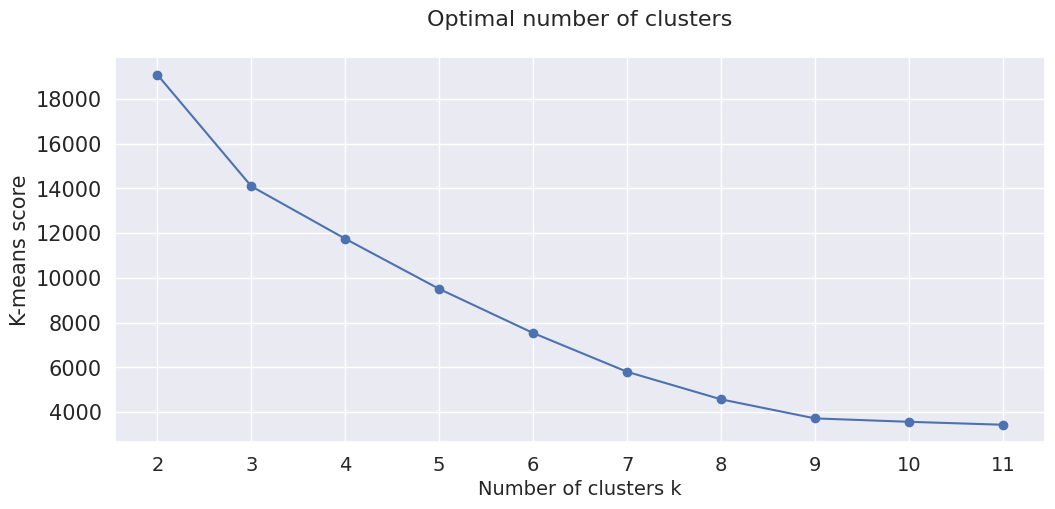

In [27]:
# Построим глафик локтя , чтобы определить оптимальное кол-во кластеров
from sklearn.cluster import KMeans

km_scores= []

for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=42).fit(normal_data)
    preds = km.predict(normal_data)
    
    print("Score for number of cluster(s) {}: {}".format(i,km.score(normal_data)))
    km_scores.append(-km.score(normal_data))
    
    
plt.figure(figsize=(12,5))
plt.title("Optimal number of clusters\n",fontsize=16)
plt.plot([i for i in range(2,12)],km_scores, marker = 'o')
plt.grid(True)
plt.xlabel("Number of clusters k",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()


In [28]:
clusterer = KMeans(n_clusters=9, random_state=42, max_iter=500)
cluster_labels = clusterer.fit_predict(normal_data)              # Найдем соответствие каждого пользователя и кластера
cluster_labels

array([1, 1, 1, ..., 0, 8, 6], dtype=int32)

# Снизить размерность (6 баллов)

Воспользуйтесь методом `t-SNE ()` (или `PCA`, `U-MAP`)

ссылка на документацию:
https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [29]:
#Использование метода t-SNE для снижение размерности до 2
from sklearn.manifold import TSNE

data_x_y = TSNE(n_components=2, learning_rate='auto',
                random_state=22, n_jobs=-1, 
                init='random').fit_transform(normal_data)
data_x_y

array([[ 30.82285   ,  63.175472  ],
       [ 30.82285   ,  63.175472  ],
       [ 26.260891  ,  55.136482  ],
       ...,
       [-30.428425  ,  48.915546  ],
       [-29.037277  ,  -0.35466263],
       [  9.0371    , -62.97496   ]], dtype=float32)

# Нарисовать полученные кластеры (10 баллов)

<AxesSubplot: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

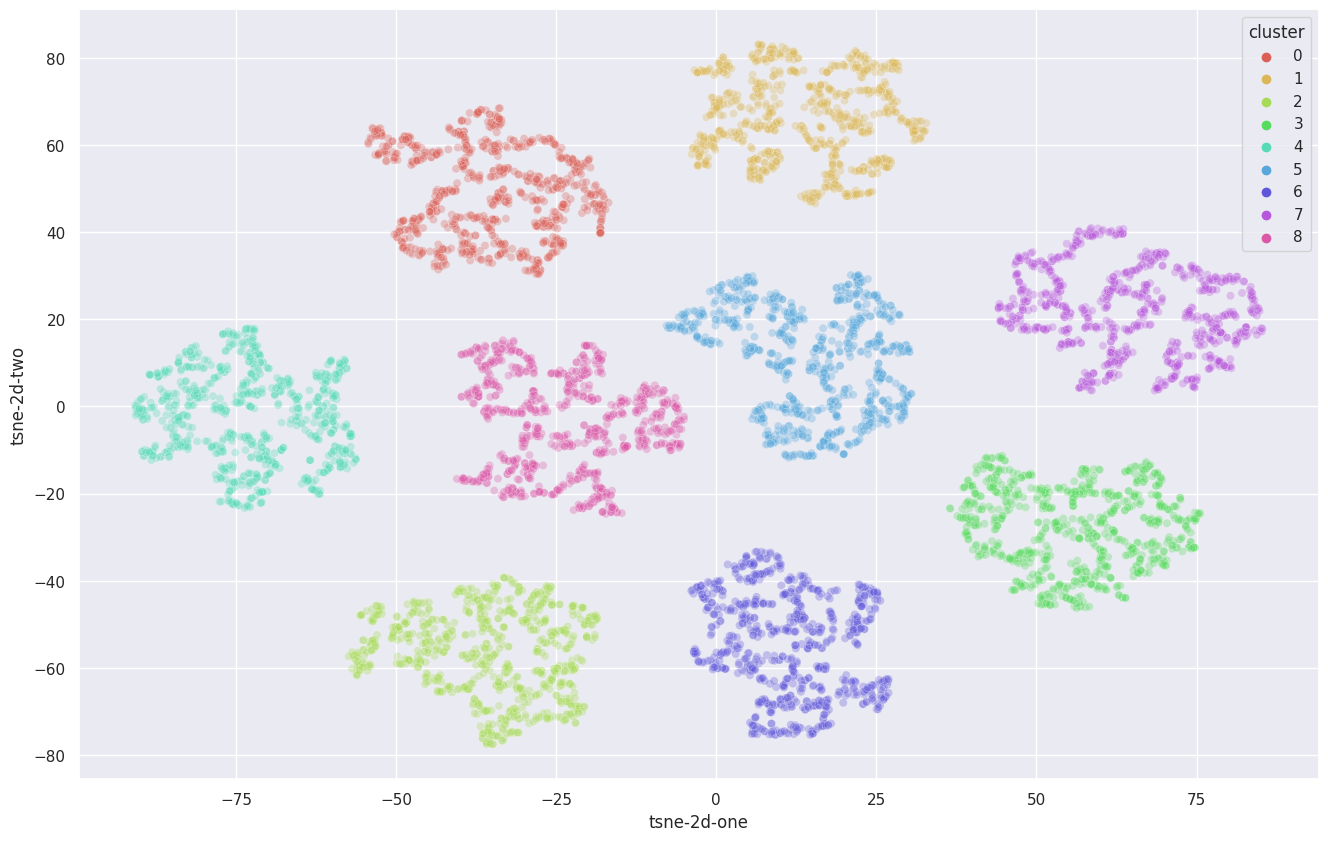

In [30]:
#Отрисовка кластеров
df_subset = pd.DataFrame()
df_subset['cluster'] = cluster_labels.tolist()     # Добавление столбца номера кластера
df_subset['tsne-2d-one'] = data_x_y[:,0]
df_subset['tsne-2d-two'] = data_x_y[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="cluster",
    palette=sns.color_palette("hls", 9),
    data=df_subset,
    legend="full",
    alpha=0.3
)

# Дополнительные баллы (+10 баллов)
* Аккуратный и понятный код **+5 баллов**
* Присутствуют лаконичные и понятные комментарии **+5 балов**